In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from tensorflow import keras

0. Airplanes
1. Cars
2. Birds
3. Cats
4. Deers
5. Dogs
6. Frogs
7. Horses
8. Ships
9. Trucks

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
number_of_categories = 10
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = keras.utils.to_categorical(y_train, number_of_categories)
y_test = keras.utils.to_categorical(y_test, number_of_categories)
# Data Normalization
X_train = X_train/255
X_test = X_test/255

In [4]:
cnn = keras.models.Sequential()

cnn.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
cnn.add(keras.layers.MaxPooling2D(pool_size=2, strides=2))
cnn.add(keras.layers.Dropout(0.3))

cnn.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn.add(keras.layers.MaxPooling2D(pool_size=2, strides=2))
cnn.add(keras.layers.Dropout(0.3))

cnn.add(keras.layers.Flatten())

cnn.add(keras.layers.Dense(units=1024, activation='relu'))
cnn.add(keras.layers.Dense(units=1024, activation='relu'))
cnn.add(keras.layers.Dense(units=10, activation='softmax'))

In [5]:
cnn.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [6]:
cnn.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4845 - accuracy: 0.4585
Epoch 2/50
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1201 - accuracy: 0.6021
Epoch 3/50
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9535 - accuracy: 0.6623
Epoch 4/50
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8346 - accuracy: 0.7053
Epoch 5/50
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7368 - accuracy: 0.7391
Epoch 6/50
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6495 - accuracy: 0.7687
Epoch 7/50
1563/1563 [==============================] - 55s 35ms/step - loss: 0.5639 - accuracy: 0.7986
Epoch 8/50
1563/1563 [==============================] - 56s 36ms/step - loss: 0.5031 - accuracy: 0.8199
Epoch 9/50
1563/1563 [==============================] - 56s 36ms/step - loss: 0.4537 - accuracy: 0.8382
Epoch 10/50
1563/1563 [==============================] - 56s 36m

In [7]:
evaluation = cnn.evaluate(X_test, y_test)
print(f"Score: {evaluation[0]}, Acuraccy: {evaluation[1]}")

313/313 [==============================] - 4s 9ms/step - loss: 1.6337 - accuracy: 0.7217
Score: 1.633666753768921, Acuraccy: 0.7217000126838684


In [8]:
predicted = cnn.predict(X_test) 
y_pred = np.argmax(predicted,axis=1)
y_test = y_test.argmax(1)

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[786,  19,  37,  20,  18,   7,  13,   4,  74,  22],
       [ 17, 849,   4,  11,   4,   4,  10,   4,  30,  67],
       [ 67,   9, 612,  52, 103,  71,  50,  17,  11,   8],
       [ 33,  11,  65, 484,  83, 203,  54,  24,  19,  24],
       [ 32,   1,  60,  74, 708,  43,  38,  30,  10,   4],
       [ 15,   5,  45, 144,  47, 660,  31,  34,   8,  11],
       [  7,   8,  53,  58,  35,  23, 799,   5,   6,   6],
       [ 27,   2,  27,  38,  77,  81,   9, 718,   5,  16],
       [ 60,  31,  16,  22,   7,   8,   5,   3, 835,  13],
       [ 40,  95,  11,  18,   4,   8,  11,  12,  35, 766]], dtype=int64)

<AxesSubplot:>

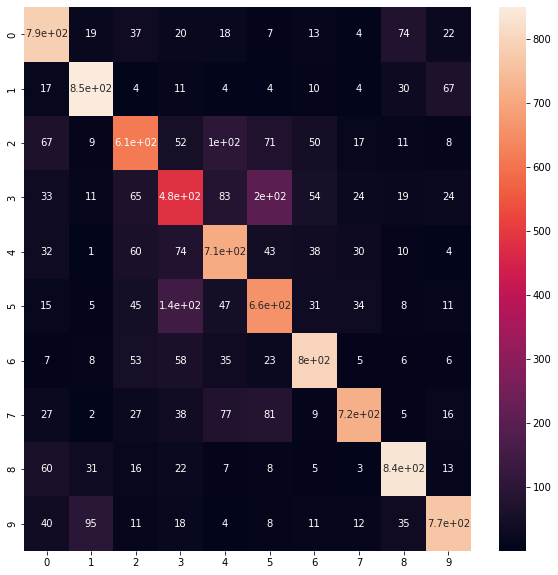

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

In [24]:
import os
directory = os.path.join(os.getcwd(), "cnn_model")
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, "CNN_Cifar10.h5")
cnn.save(model_path)